In [5]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [6]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

In [7]:
#env = gym.make('Pendulum-v0')
env = gym.make('LunarLanderContinuous-v2')
learner = rltrain.DDPG(env, gamma=0.99, net_args={'hidden_dims': [64,64]})

learner.show_loss_every = 100000
#viz = helpers.PendulumViz(learner)
viz = helpers.GenericViz(learner)


Actor (mu): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=2, bias=True)
    (5): Tanh()
  )
)
Critic (Q): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


Replay Buffer has 683 transitions


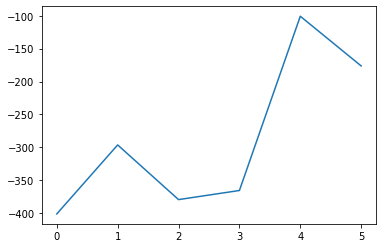

Replay Buffer has 5227 transitions


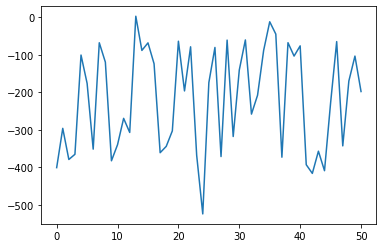

Replay Buffer has 10384 transitions


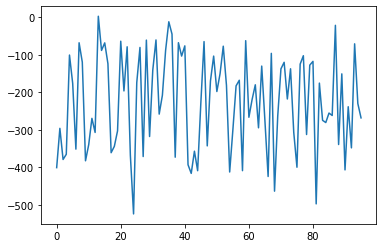

In [8]:
learner.eps = 1
for i in tqdm(range(100), "random warmup"):
    learner.rollout()
    if i % 45 == 5:
        print(f"Replay Buffer has {len(learner._replay)} transitions")
        viz.plot_q()



Eps = 0.97 on 1 of 10


/Users/leodirac/dev/ddpg/rldqn.py:151: UserWarning: calc_qval_batch can usually be replaced with just forward()
  warnings.warn("calc_qval_batch can usually be replaced with just forward()")


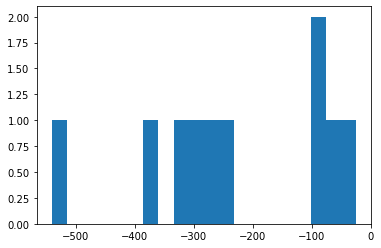

Reward mean,std = -236.472 +/- 152.669


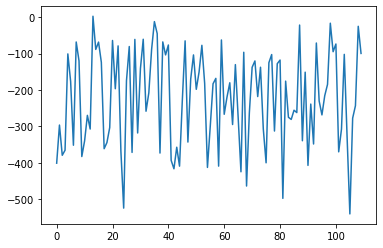



Eps = 0.86 on 2 of 10


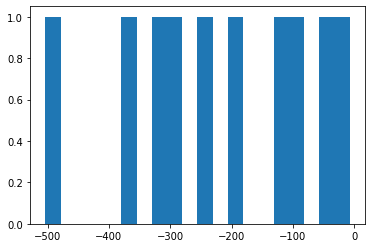

Reward mean,std = -221.650 +/- 149.692


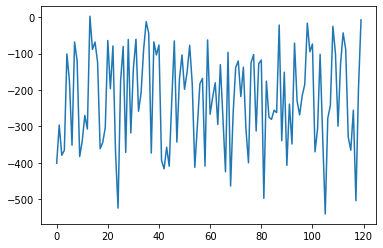



Eps = 0.76 on 3 of 10


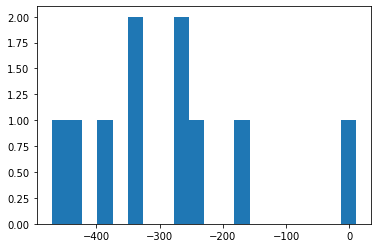

Reward mean,std = -292.404 +/- 133.669


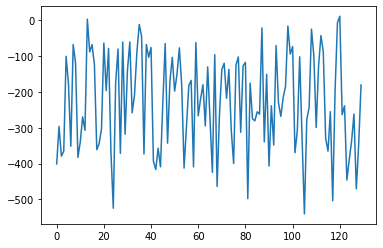



Eps = 0.65 on 4 of 10


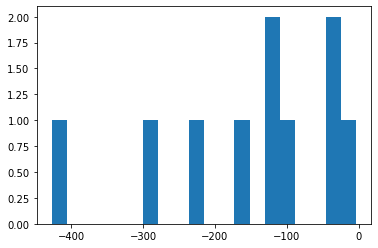

Reward mean,std = -151.841 +/- 125.432


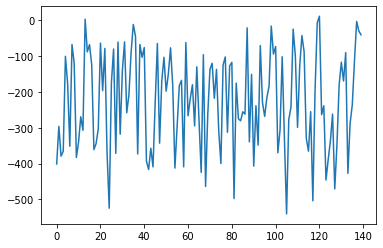



Eps = 0.55 on 5 of 10


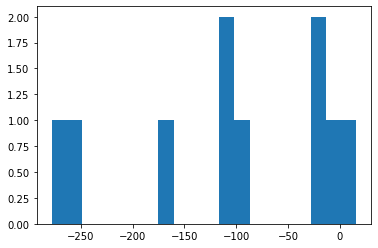

Reward mean,std = -103.874 +/- 97.075


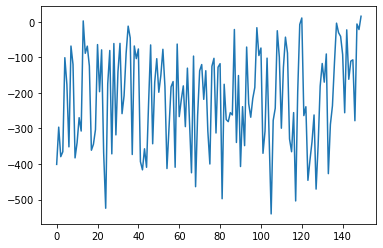



Eps = 0.44 on 6 of 10


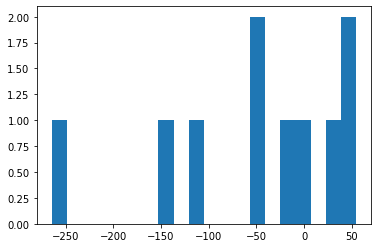

Reward mean,std = -49.708 +/- 94.790


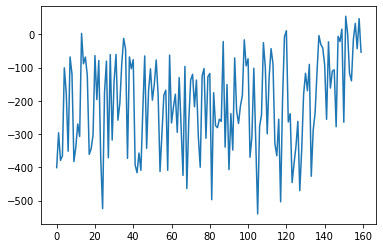



Eps = 0.34 on 7 of 10


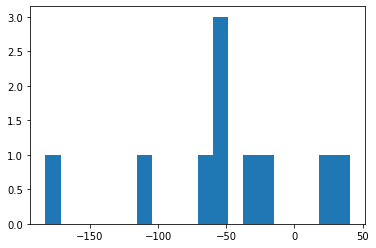

Reward mean,std = -53.005 +/- 59.567


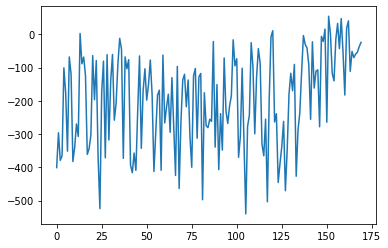



Eps = 0.23 on 8 of 10


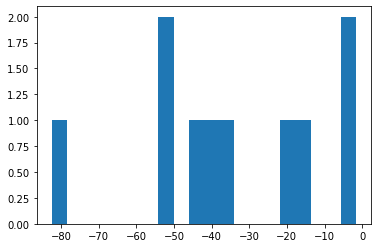

Reward mean,std = -34.971 +/- 23.984


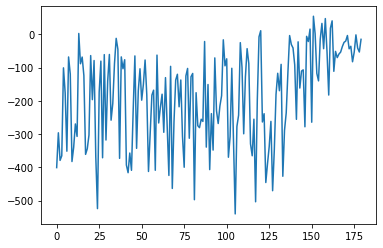



Eps = 0.13 on 9 of 10


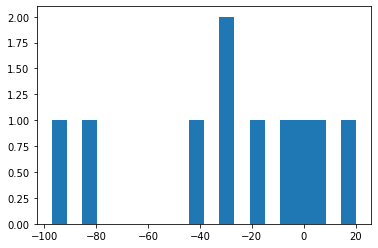

Reward mean,std = -28.152 +/- 35.258


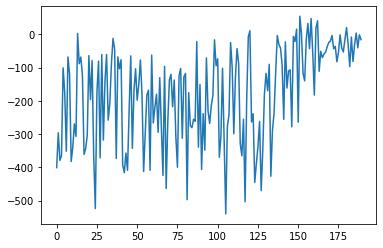



Eps = 0.02 on 10 of 10


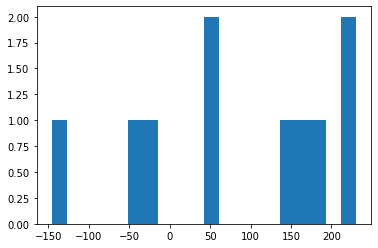

Reward mean,std = 84.109 +/- 121.517


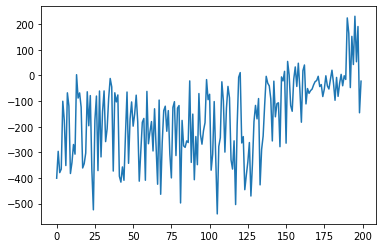

In [9]:
N = 10
for d in range(N):
    eps = 1.0 - (d+0.3)/(N-0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps, n=10)
    viz.plot_q()

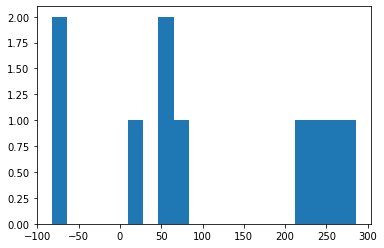

Reward mean,std = 103.410 +/- 131.096


In [10]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=10)

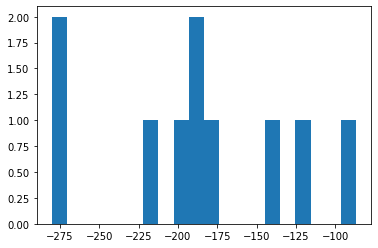

Reward mean,std = -187.678 +/- 59.676


In [11]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=10)

In [12]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%  1126.34ms/cyc @     1.0 calls/cyc
              do_learning:  76.5%   861.92ms/cyc @   218.5 calls/cyc
            critic_update:  29.3%   329.46ms/cyc @   167.6 calls/cyc
             move_targets:  21.8%   245.90ms/cyc @   167.6 calls/cyc
             actor_update:  20.1%   225.85ms/cyc @   167.6 calls/cyc
                   sample:   4.4%    49.00ms/cyc @   167.6 calls/cyc


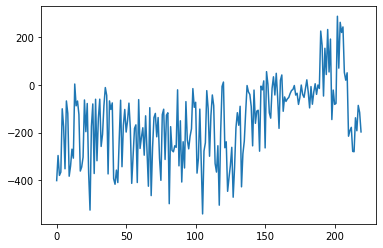

In [13]:
plt.plot(learner.reward_history)

In [14]:
learner.eps=0.0
learner.rollout(render=True)

(357, 268.25075606635113)

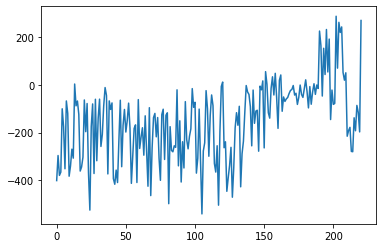

In [15]:
viz.plot_q()